Scikit-image2 est une bibliothèque libre comprenant une large collection d'algorithme pour le traitement d'images en Python.

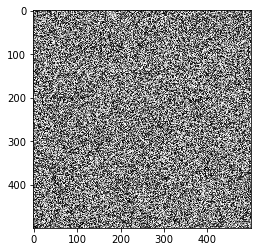

In [1]:
#Image aléatoire avec Niveau de gris et ajout d'un repère automatique avec Skimage je crois

%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
random_image = np.random.random([500, 500])
plt.imshow(random_image, cmap='gray', interpolation='nearest');

In [2]:
plt.rcParams['image.cmap'] = 'gray' # I don't understand ?

In [3]:
plt.rcParams['image.interpolation'] = 'nearest' # Da Fuck ?

<class 'numpy.ndarray'>


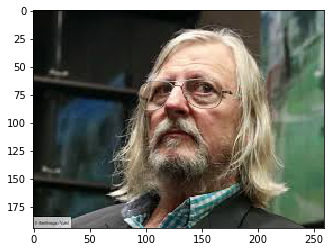

In [4]:
#Insertion de la belle image Didoudinet Raoult !!!!!

from skimage import io

image = io.imread('didounet.jpg')

print(type(image))
plt.imshow(image);

/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


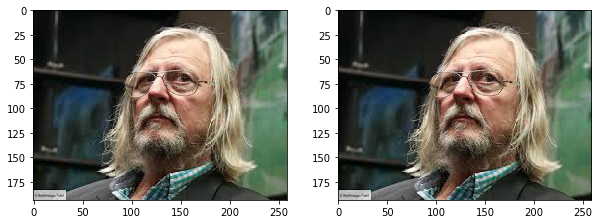

In [5]:
#Doublement de l'image je crois que c'est que ça

import matplotlib.pyplot as plt
import numpy as np

from IPython.html.widgets import interact, fixed
from matplotlib import cm as colormaps
import matplotlib.colors
import inspect


fig, (ax_jet, ax_gray) = plt.subplots(ncols=2, figsize=(10, 5))

ax_jet.imshow(image, cmap='jet')
ax_gray.imshow(image, cmap='gray');

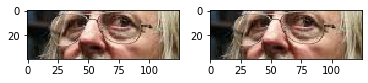

In [6]:
#Zoom sur les beaux yeux de Didi

face = image[60:100, 75:200]
fig, (ax_jet, ax_gray) = plt.subplots(ncols=2)
ax_jet.imshow(face, cmap='jet')
ax_gray.imshow(face, cmap='gray');

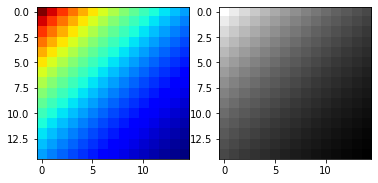

In [7]:
#Taille des pixels couleurs (dégradé et gris ?)

X, Y = np.ogrid[-5:10:1, -5:10:1]
R = np.exp(-(X**1 + Y**1) / 15)

fig, (ax_jet, ax_gray) = plt.subplots(1, 2)
ax_jet.imshow(R, cmap='jet')
ax_gray.imshow(R, cmap='gray');

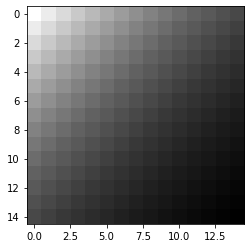

In [8]:
# Interpolation : rend la courbe plus simple tout en faisant coincider

plt.imshow(R, cmap='gray', interpolation='nearest');

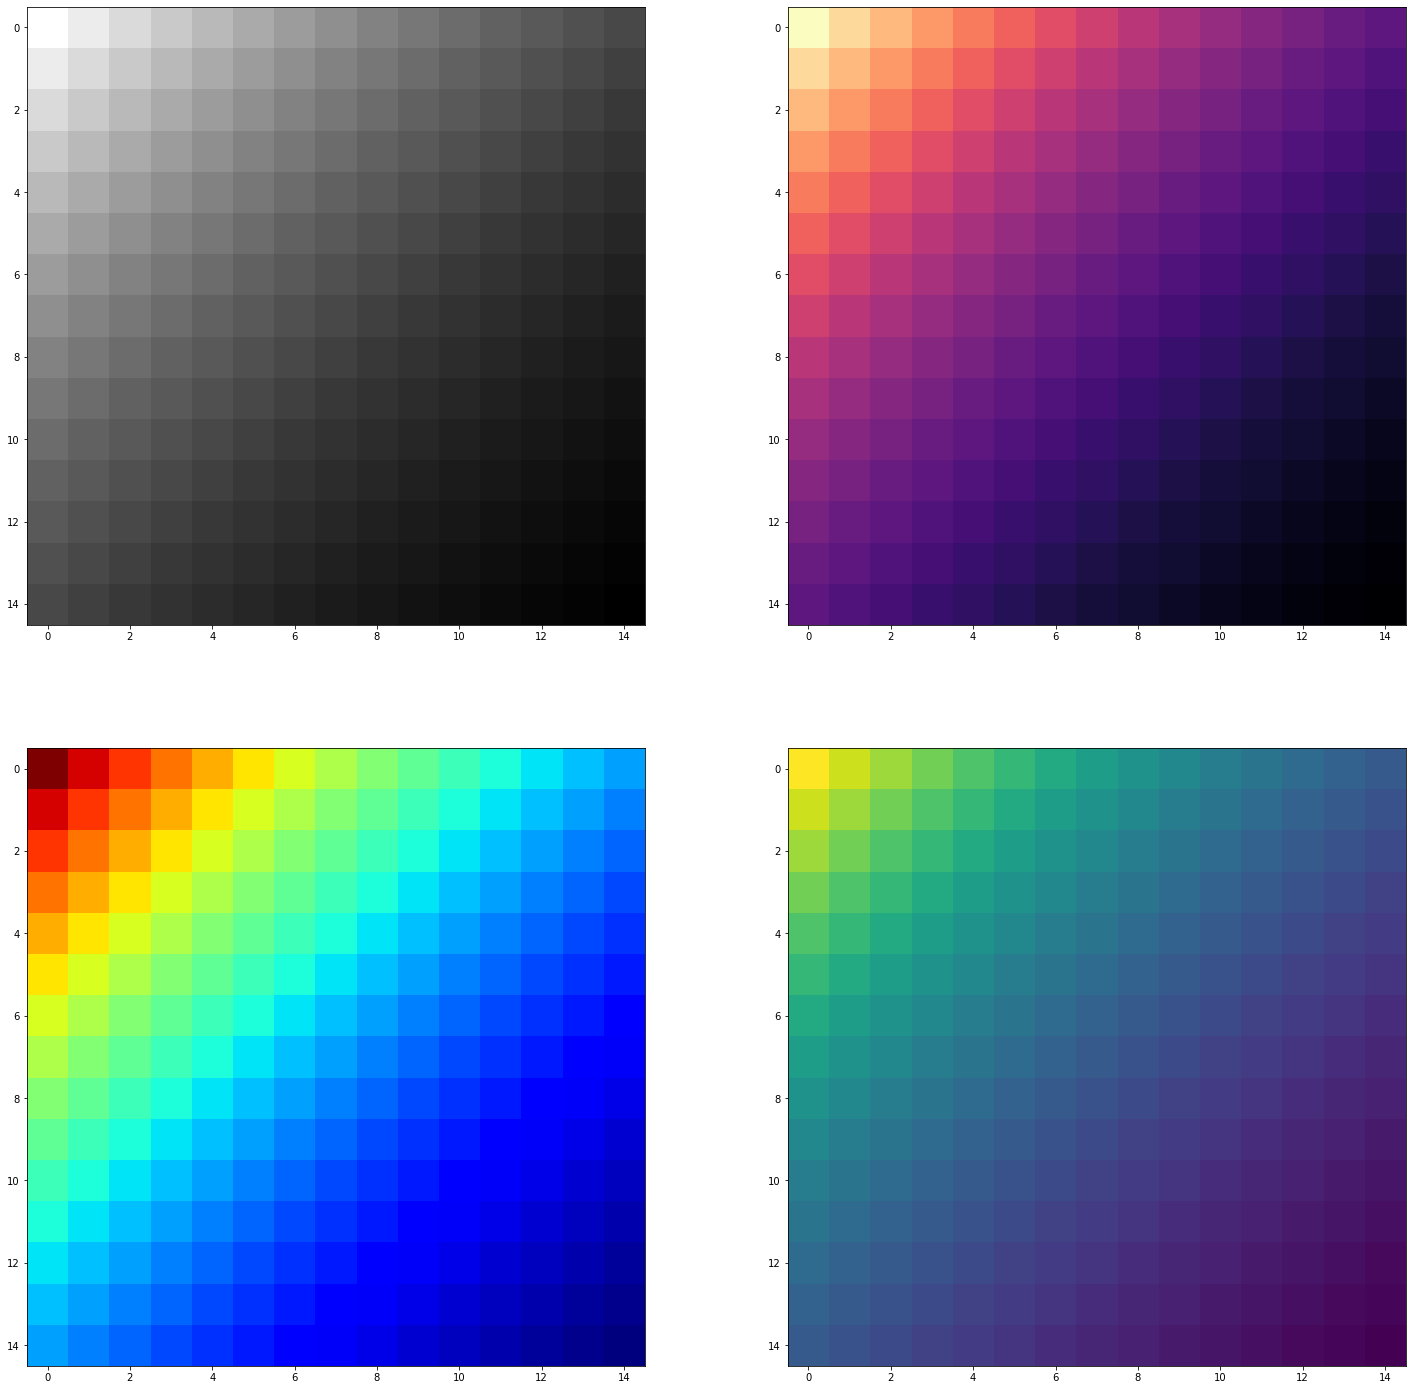

In [41]:
# Nombres de graphes à afficher, position, taille.... Réglage des couleurs (nv gris...)

fig, axes = plt.subplots(2, 2, figsize=(25, 25))

axes[1, 0].imshow(R, cmap='jet')
axes[1, 1].imshow(R, cmap='viridis')
axes[0, 1].imshow(R, cmap='magma')
axes[0, 0].imshow(R, cmap='gray');

<class 'numpy.ndarray'> uint8 (194, 259, 3)


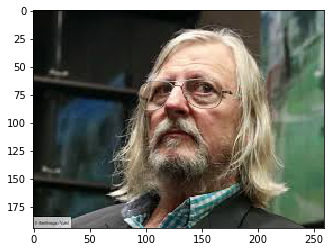

In [9]:
# Infos

from skimage import data

print(type(image), image.dtype, image.shape)
plt.imshow(image, cmap='gray', interpolation='nearest');

Shape: (194, 259, 3)
Values min/max: 0 255


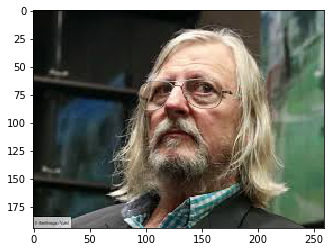

In [10]:
# Infos

print("Shape:", image.shape)
print("Values min/max:", image.min(), image.max())

plt.imshow(image, interpolation='nearest');

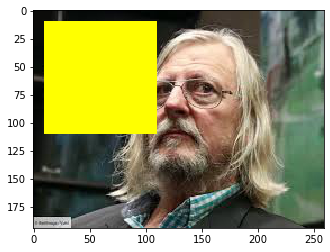

In [14]:
#Rajout d'un carré jaune

image[10:110, 10:110, :] = [255, 255, 0]  # [red, green, blue]
plt.imshow(image);

Linear0: float64 1.0 255.0
Linear1: uint8 1 255


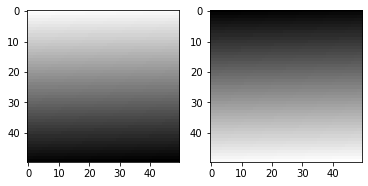

In [25]:
#Réglage du Niveau de gris ?

linear0 = np.linspace(255, 1, 2500).reshape((50, 50))
linear1 = np.linspace(1, 255, 2500).reshape((50, 50)).astype(np.uint8)

print("Linear0:", linear0.dtype, linear0.min(), linear0.max())
print("Linear1:", linear1.dtype, linear1.min(), linear1.max())

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(linear0, cmap='gray')
ax1.imshow(linear1, cmap='gray');

Jeu de données faces et non faces
Un échantillon de 36 images sur 200 est affiché.

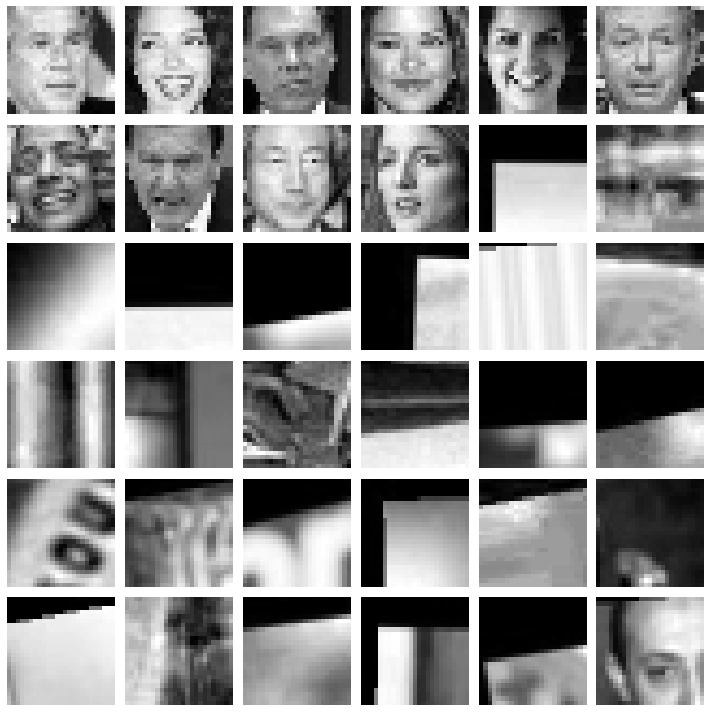

In [49]:
fig, axes = plt.subplots(6, 6, figsize=(10, 10))
ax = axes.ravel()
images = data.lfw_subset()
for i in range(36):
    ax[i].imshow(images[90+i], cmap=plt.cm.gray)
    ax[i].axis('off')
fig.tight_layout()
plt.show()

Images scientifiques
Le titre de chaque image indique le nom de la fonction.

AttributeError: module 'skimage.data' has no attribute 'lily'

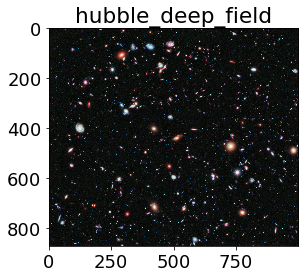

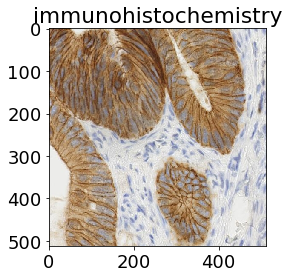

In [54]:
matplotlib.rcParams['font.size'] = 18

images = ('hubble_deep_field',
          'immunohistochemistry',
          'lily',
          'microaneurysms',
          'moon',
          'retina',
          'shepp_logan_phantom',
          'cell',
          )


for name in images:
    caller = getattr(data, name)
    image = caller()
    plt.figure()
    plt.title(name)
    if image.ndim == 2:
        plt.imshow(image, cmap=plt.cm.gray)
    else:
        plt.imshow(image)

plt.show()

Images à usage général

AttributeError: module 'skimage.data' has no attribute 'cat'

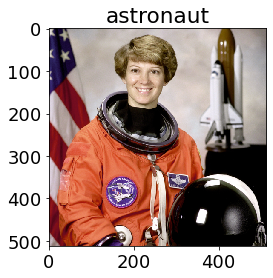

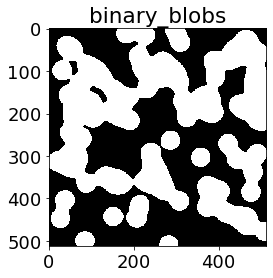

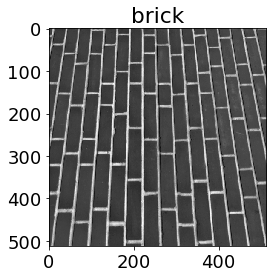

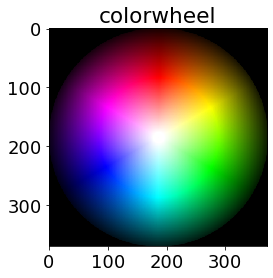

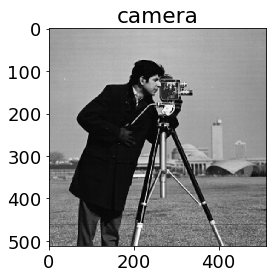

In [53]:
matplotlib.rcParams['font.size'] = 18

images = ('astronaut',
          'binary_blobs',
          'brick',
          'colorwheel',
          'camera',
          'cat',
          'checkerboard',
          'clock',
          'coffee',
          'coins',
          'eagle',
          'grass',
          'gravel',
          'horse',
          'logo',
          'page',
          'text',
          'rocket',
          )


for name in images:
    caller = getattr(data, name)
    image = caller()
    plt.figure()
    plt.title(name)
    if image.ndim == 2:
        plt.imshow(image, cmap=plt.cm.gray)
    else:
        plt.imshow(image)

plt.show()

Réglage du contraste gamma et log¶
Cet exemple ajuste le contraste de l'image en effectuant une correction Gamma et une correction logarithmique sur l'image d'entrée.

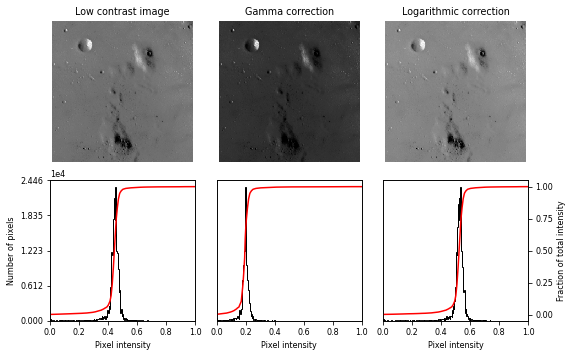

In [55]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = data.moon()

# Gamma
gamma_corrected = exposure.adjust_gamma(img, 2)

# Logarithmic
logarithmic_corrected = exposure.adjust_log(img, 1)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(gamma_corrected, axes[:, 1])
ax_img.set_title('Gamma correction')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(logarithmic_corrected, axes[:, 2])
ax_img.set_title('Logarithmic correction')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

Égalisation d'histogramme
Cet exemple améliore une image avec un faible contraste, en utilisant une méthode appelée égalisation d'histogramme, qui «étale les valeurs d'intensité les plus fréquentes» dans une image 1. L'image égalisée a une fonction de distribution cumulative à peu près linéaire.

Bien que l'égalisation d'histogramme ait l'avantage de ne nécessiter aucun paramètre, elle produit parfois des images d'apparence non naturelle. Une autre méthode consiste à étirer le contraste, où l'image est redimensionnée pour inclure toutes les intensités comprises entre les 2e et 98e percentiles 2.

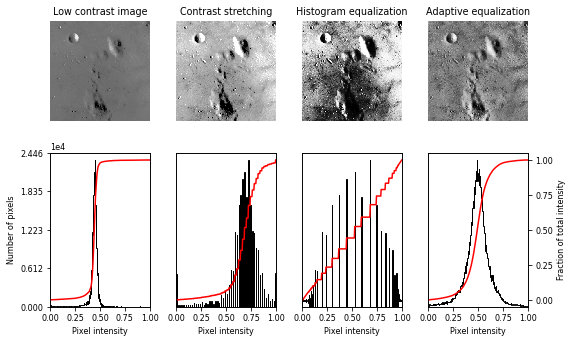

In [56]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = data.moon()

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()